In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
bikes=pd.read_csv('E:/DSS/gilthub projects/05-bike sharing-gradient boost/bikesharing.csv', index_col=0)
bikes

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341


In [3]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [4]:
bikes.size

10950

In [5]:
bikes.shape

(730, 15)

In [6]:
bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Checking for null values
bikes.isna().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
bikes.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [9]:
# Numerical values to string values in season column
bikes['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [10]:
# Alternate code
#bikes.loc[(bikes["season"]==1),"season"]="spring"
#bikes.loc[(bikes["season"]==2),"season"]="summer"
#bikes.loc[(bikes["season"]==3),"season"]="fall"
#bikes.loc[(bikes["season"]==4),"season"]="winter"

In [11]:
bikes['season']=bikes['season'].replace(1, 'Spring')
bikes['season']=bikes['season'].replace(2, 'summer')
bikes['season']=bikes['season'].replace(3, 'fall')
bikes['season']=bikes['season'].replace(4, 'winter')

In [12]:
bikes['season'].unique()

array(['Spring', 'summer', 'fall', 'winter'], dtype=object)

In [13]:
bikes['season'].value_counts()

fall      188
summer    184
Spring    180
winter    178
Name: season, dtype: int64

In [14]:
bikes['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [15]:
# Convert month numbers into string
# write function
def object_map(x):
    return x.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"July",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})

In [16]:
# Use above function
bikes[['mnth']]=bikes[['mnth']].apply(object_map)

In [17]:
bikes['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [18]:
bikes['mnth'].value_counts()

Dec     62
Mar     62
Jan     62
Oct     62
July    62
May     62
Aug     62
Jun     60
Nov     60
Sep     60
Apr     60
Feb     56
Name: mnth, dtype: int64

In [19]:
bikes['holiday'].value_counts() # better to drop this columns

0    709
1     21
Name: holiday, dtype: int64

In [20]:
bikes['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [21]:
def object_map(x):
    return x.map({0:"Tue",1:"Wed",2:"Thu",3:"Fri",4:"Sat",5:"Sun",6:"Mon",}) 


In [22]:
bikes[['weekday']]=bikes[['weekday']].apply(object_map)

In [23]:
bikes['weekday'].unique()

array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], dtype=object)

In [24]:
bikes['weekday'].value_counts()

Tue    105
Wed    105
Mon    105
Sat    104
Sun    104
Thu    104
Fri    103
Name: weekday, dtype: int64

In [25]:
bikes['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [26]:
bikes['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [27]:
bikes['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [28]:
bikes.loc[(bikes["weathersit"]==1),"weathersit"]="A"
bikes.loc[(bikes["weathersit"]==2),"weathersit"]="B"
bikes.loc[(bikes["weathersit"]==3),"weathersit"]="C"
bikes.loc[(bikes["weathersit"]==4),"weathersit"]="D"

In [29]:
bikes['weathersit'].value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [30]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 91.2+ KB


C:\Users\Veera Bhadra Chary\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


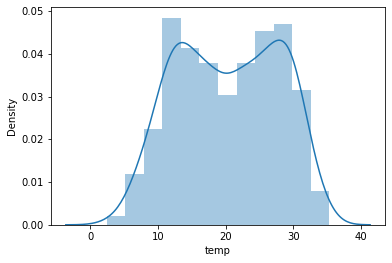

In [31]:
sb.distplot(bikes['temp'])
plt.show()


C:\Users\Veera Bhadra Chary\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


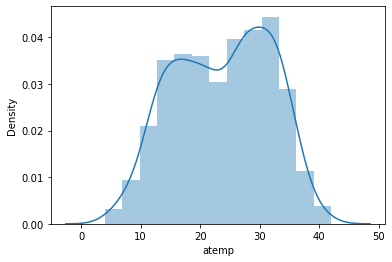

In [32]:
sb.distplot(bikes['atemp'])
plt.show()

C:\Users\Veera Bhadra Chary\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


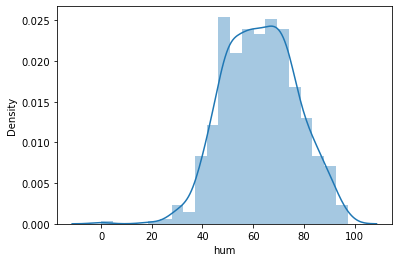

In [33]:
sb.distplot(bikes['hum'])
plt.show()

C:\Users\Veera Bhadra Chary\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


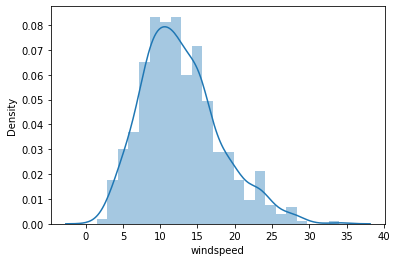

In [34]:
sb.distplot(bikes['windspeed'])
plt.show()

C:\Users\Veera Bhadra Chary\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


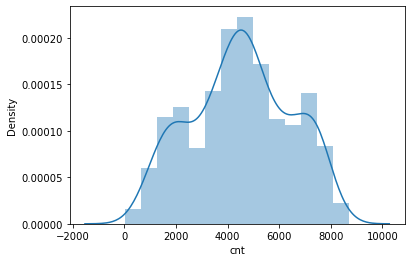

In [35]:
sb.distplot(bikes['cnt'])
plt.show()

In [36]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 91.2+ KB


In [37]:
# Verification of date time object
bikes['dteday']=pd.to_datetime(bikes['dteday'])
#bikes['dteday']=bikes['dteday'].astype(bikes['dteday'])

In [38]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 91.2+ 

In [39]:
bikes_categorical=bikes.select_dtypes("object")

In [40]:
bikes_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      730 non-null    object
 1   mnth        730 non-null    object
 2   weekday     730 non-null    object
 3   weathersit  730 non-null    object
dtypes: object(4)
memory usage: 28.5+ KB


In [41]:
bikes_categorical

,season,mnth,weekday,weathersit
instant,,,,
1,Spring,Jan,Mon,B
2,Spring,Jan,Tue,B
3,Spring,Jan,Wed,A
4,Spring,Jan,Thu,A
5,Spring,Jan,Fri,A
...,...,...,...,...
726,Spring,Dec,Sat,B
727,Spring,Dec,Sun,B
728,Spring,Dec,Mon,B


<AxesSubplot:xlabel='season', ylabel='cnt'>

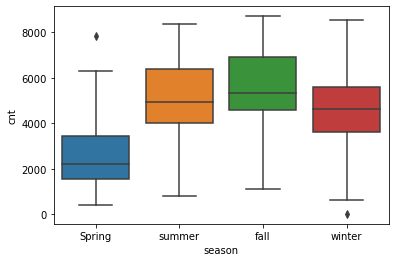

In [42]:
#plt.subplots(3,3,1)
sb.boxplot(x=bikes["season"],y=bikes["cnt"])

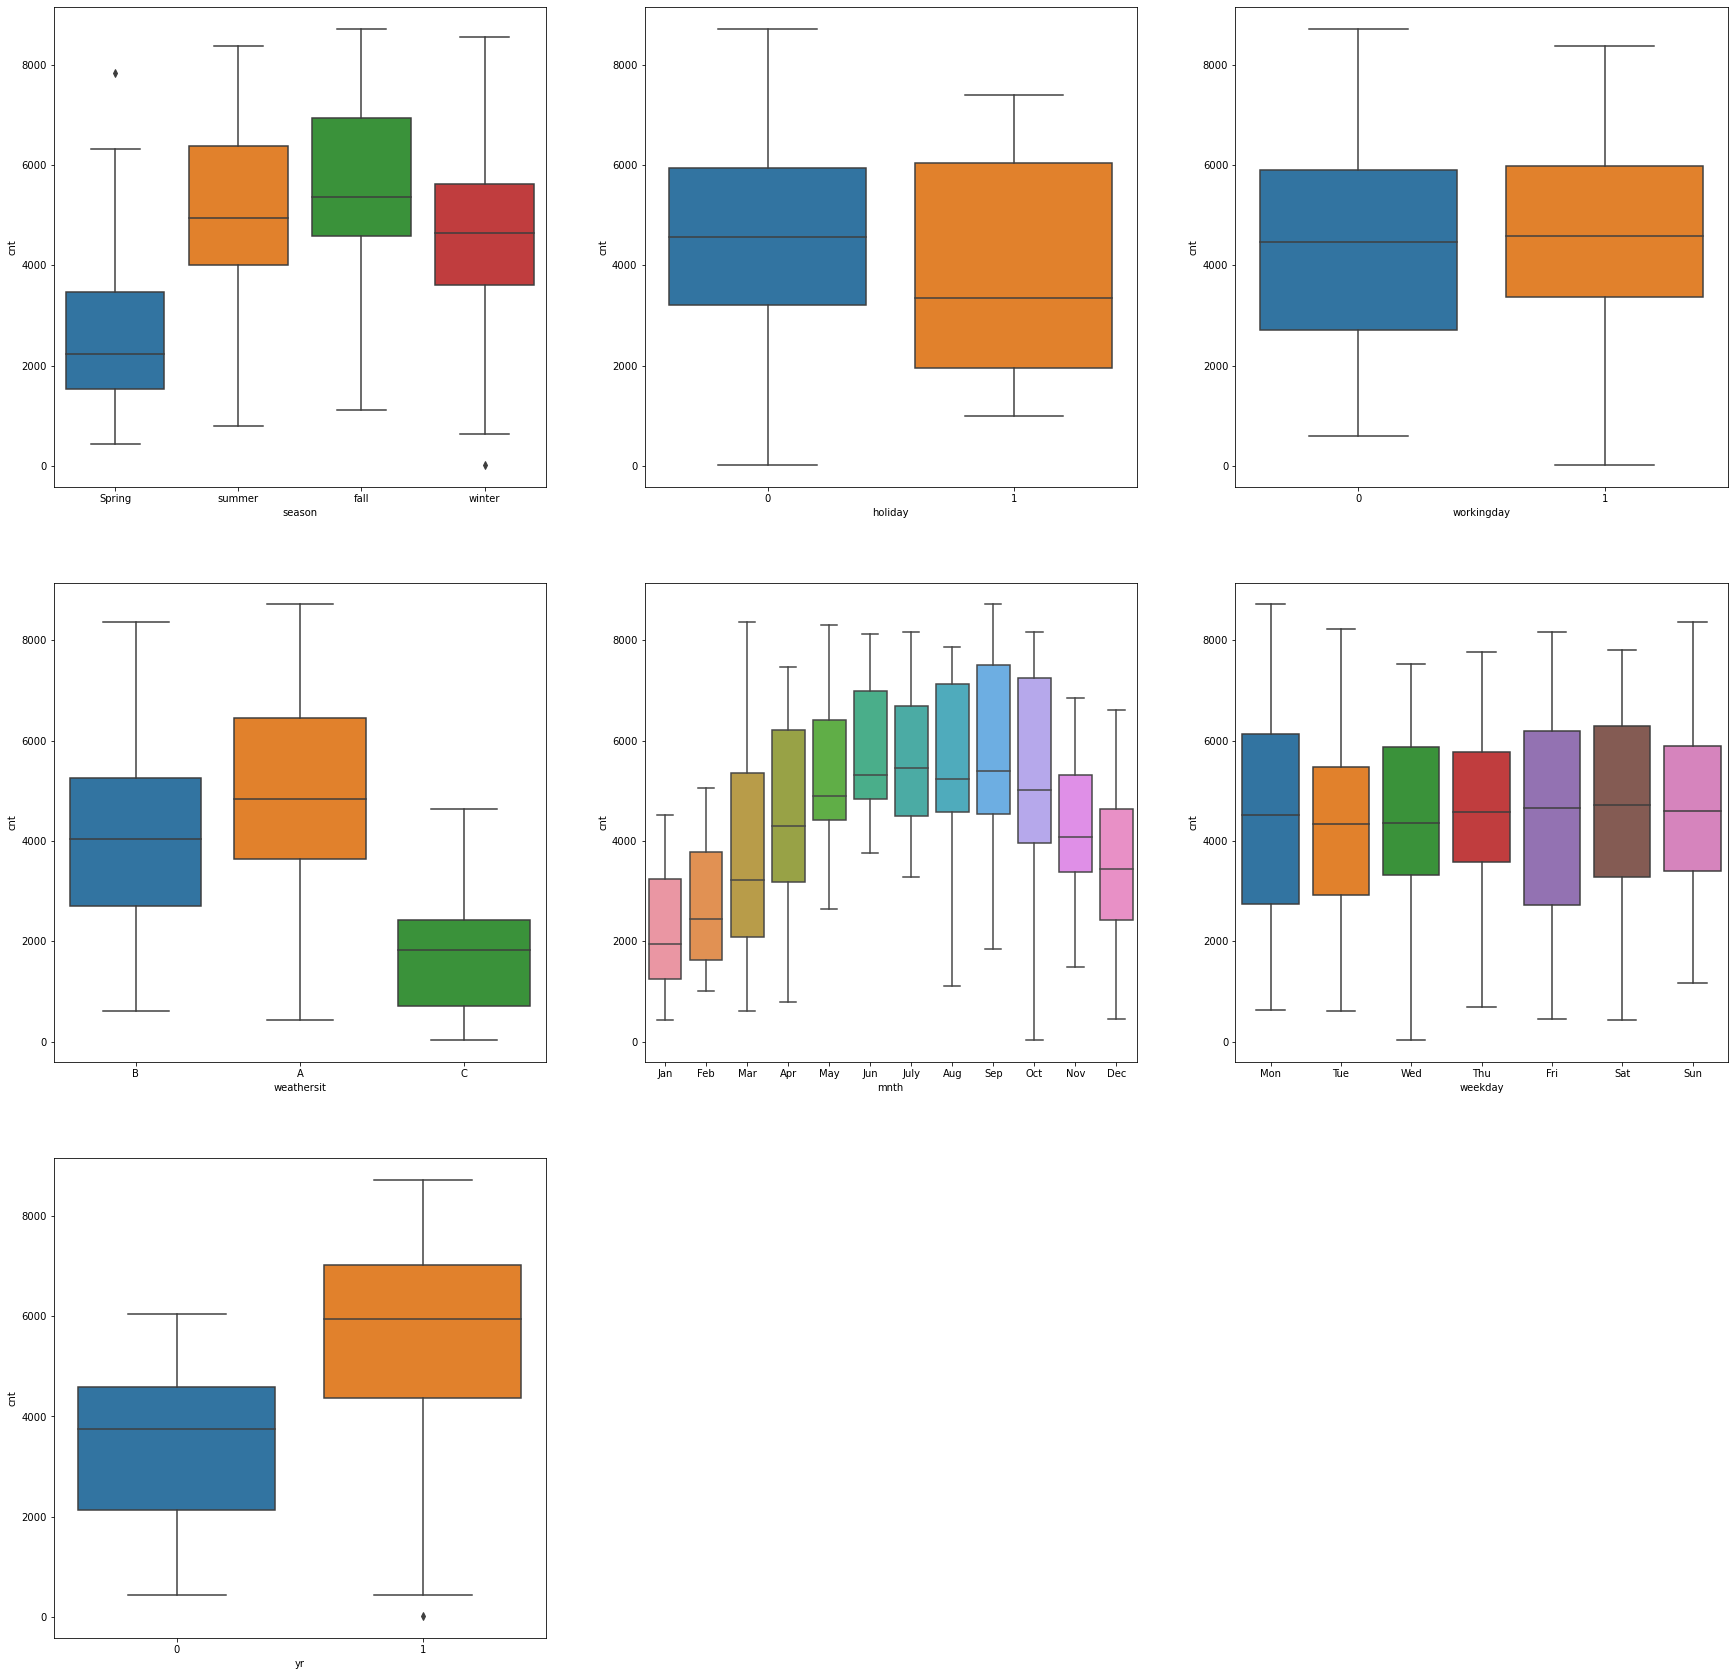

In [43]:
plt.figure(figsize=(30,30)) #This command will fix figure sizes
plt.subplot(3,3,1)
sb.boxplot(x=bikes["season"],y=bikes["cnt"])
plt.subplot(3,3,2)
sb.boxplot(x="holiday",y="cnt", data=bikes)
plt.subplot(3,3,3)
sb.boxplot(x="workingday",y="cnt", data=bikes)
plt.subplot(3,3,4)
sb.boxplot(x="weathersit",y="cnt", data=bikes)
plt.subplot(3,3,5)
sb.boxplot(x="mnth",y="cnt", data=bikes)
plt.subplot(3,3,6)
sb.boxplot(x="weekday",y="cnt", data=bikes)
plt.subplot(3,3,7)
sb.boxplot(x="yr",y="cnt", data=bikes)
plt.show()


In [44]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 111.2+

In [45]:
# how to get all numerical columns
bikes_numeric=bikes.select_dtypes(include=["float64","int64"])

In [46]:
bikes_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   casual      730 non-null    int64  
 8   registered  730 non-null    int64  
 9   cnt         730 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 82.7 KB


In [47]:
bikes_numeric.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [48]:
bikes_numeric=bikes_numeric.drop(['yr', 'holiday', 'workingday'],axis=1)

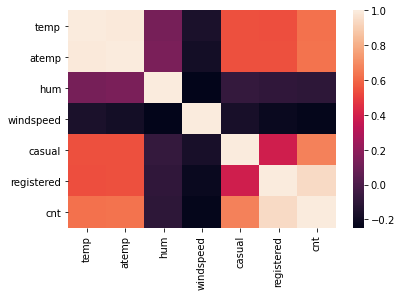

In [49]:
sb.heatmap(bikes_numeric.corr())
plt.show()

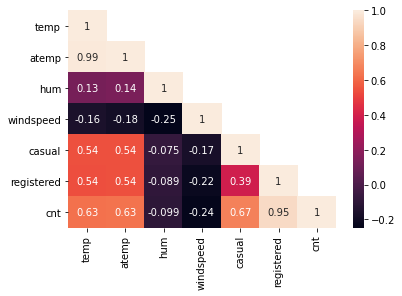

In [50]:
mask=np.array(bikes_numeric.corr())
mask[np.tril_indices_from(mask)]=False  #Remove mirror images
sb.heatmap(bikes_numeric.corr(),mask=mask,annot=True)
plt.show()

In [51]:
mask

array([[ 0.        ,  0.99169618,  0.12856468, -0.15818638,  0.54273144,
         0.53943622,  0.62704403],
       [ 0.        ,  0.        ,  0.14151172, -0.1838764 ,  0.54336235,
         0.54367823,  0.63068535],
       [ 0.        ,  0.        ,  0.        , -0.24850587, -0.07521137,
        -0.08921192, -0.09854288],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.16799534,
        -0.21791436, -0.2351325 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.39413716,  0.67212341],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.94541061],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

In [52]:
bikes_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        730 non-null    float64
 1   atemp       730 non-null    float64
 2   hum         730 non-null    float64
 3   windspeed   730 non-null    float64
 4   casual      730 non-null    int64  
 5   registered  730 non-null    int64  
 6   cnt         730 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 65.6 KB


In [53]:
 # custamization of temp and atmp correlations
bikes.drop(["atemp"], axis=1,inplace=True)

In [54]:
bikes_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        730 non-null    float64
 1   atemp       730 non-null    float64
 2   hum         730 non-null    float64
 3   windspeed   730 non-null    float64
 4   casual      730 non-null    int64  
 5   registered  730 non-null    int64  
 6   cnt         730 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 65.6 KB


In [55]:
bikes_categorical

,season,mnth,weekday,weathersit
instant,,,,
1,Spring,Jan,Mon,B
2,Spring,Jan,Tue,B
3,Spring,Jan,Wed,A
4,Spring,Jan,Thu,A
5,Spring,Jan,Fri,A
...,...,...,...,...
726,Spring,Dec,Sat,B
727,Spring,Dec,Sun,B
728,Spring,Dec,Mon,B


In [56]:
bikes_categorical_dummies=pd.get_dummies(bikes_categorical,drop_first=True)

In [57]:
bikes_categorical_dummies

,season_fall,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
727,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
728,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [58]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   hum         730 non-null    float64       
 10  windspeed   730 non-null    float64       
 11  casual      730 non-null    int64         
 12  registered  730 non-null    int64         
 13  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(6), object(4)
memory usage: 105.5+ KB


In [59]:
bikes=bikes.drop(list(bikes_categorical.columns),axis=1)

In [60]:
bikes=pd.concat([bikes,bikes_categorical_dummies],axis=1)

In [61]:
bikes

,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,1,0
2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,1,0,1,0
3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,1,0,0
4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,1,0,0,0,0
5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247,1867,2114,...,0,0,0,1,0,0,0,0,1,0
727,2019-12-28,1,0,1,10.386653,59.0000,10.416557,644,2451,3095,...,0,0,0,0,1,0,0,0,1,0
728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159,1182,1341,...,0,0,1,0,0,0,0,0,1,0


In [62]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dteday         730 non-null    datetime64[ns]
 1   yr             730 non-null    int64         
 2   holiday        730 non-null    int64         
 3   workingday     730 non-null    int64         
 4   temp           730 non-null    float64       
 5   hum            730 non-null    float64       
 6   windspeed      730 non-null    float64       
 7   casual         730 non-null    int64         
 8   registered     730 non-null    int64         
 9   cnt            730 non-null    int64         
 10  season_fall    730 non-null    uint8         
 11  season_summer  730 non-null    uint8         
 12  season_winter  730 non-null    uint8         
 13  mnth_Aug       730 non-null    uint8         
 14  mnth_Dec       730 non-null    uint8         
 15  mnth_Feb       730 non-

In [63]:
bikes.drop(['dteday'],axis=1,inplace=True)

In [64]:
bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_fall,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,80.5833,10.749882,331,654,985,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,14.902598,69.6087,16.652113,131,670,801,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.050924,43.7273,16.636703,120,1229,1349,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,8.200000,59.0435,10.739832,108,1454,1562,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,1,9.305237,43.6957,12.522300,82,1518,1600,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x=bikes.drop("cnt",axis=1)
y=bikes["cnt"]

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=100)

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
scaler=MinMaxScaler()

In [72]:
x_train[["temp","hum","windspeed","casual","registered"]]=scaler.fit_transform(x_train[["temp","hum","windspeed","casual","registered"]])

<ipython-input-72-aeeb80800b32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[["temp","hum","windspeed","casual","registered"]]=scaler.fit_transform(x_train[["temp","hum","windspeed","casual","registered"]])
C:\Users\Veera Bhadra Chary\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [74]:
x_test[["temp","hum","windspeed","casual","registered"]]=scaler.transform(x_test[["temp","hum","windspeed","casual","registered"]])

<ipython-input-74-01c639b45930>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[["temp","hum","windspeed","casual","registered"]]=scaler.transform(x_test[["temp","hum","windspeed","casual","registered"]])
C:\Users\Veera Bhadra Chary\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [75]:
from sklearn.ensemble import GradientBoostingRegressor

In [76]:
model=GradientBoostingRegressor()

In [77]:
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [78]:
model.score(x_test,y_test)

0.995626641655917

In [79]:
model.score(x_train,y_train)

0.9990581143947275

In [81]:
model

GradientBoostingRegressor()